<a href="https://colab.research.google.com/github/Fzaplana/Green-Start/blob/master/Hpsp_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import os
#os.chdir('/Users/franciscozaplana/Downloads/TESIS')
os.chdir('/content/drive/My Drive/Download/TESIS/')
os.getcwd()

'/content/drive/My Drive/Download/TESIS'

In [14]:
pd.set_option('display.max_columns',50)
pd.get_option("display.max_columns")

50

In [0]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Import Datasets:

Importamos el Dataset extraido de OpenData de Barcelona de los Hospitales y Centros de primera atención.

Solo importamos las columnas mas relevantes para nuestro analisis, las hemos seleccionado previamente.

In [0]:
Hosp = pd.read_csv('S0002_Hospitals_I_dAtencio_Primaria.csv', usecols=[0,1,2,3,4,5,6,7,8,9,10,11,14,15,16,17,18,19])

In [17]:
# revisamos la cantidad de Columnas cargadas
Hosp.columns.value_counts().sum()

18

In [10]:
Hosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CODI_EQUIPAMENT  399 non-null    int64  
 1   EQUIPAMENT       399 non-null    object 
 2   SECCIO           399 non-null    object 
 3   TIPUS_VIA        399 non-null    object 
 4   NOM_CARRER       399 non-null    object 
 5   NUM_CARRER_1     399 non-null    int64  
 6   NUM_CARRER_2     396 non-null    float64
 7   CODI_BARRI       399 non-null    int64  
 8   NUM_BARRI        399 non-null    object 
 9   CODI_DISTRICTE   399 non-null    int64  
 10  NOM_DISTRICTE    399 non-null    object 
 11  CODI_POSTAL      399 non-null    int64  
 12  LATITUD          399 non-null    float64
 13  LONGITUD         399 non-null    float64
 14  X_ETRS89         399 non-null    float64
 15  Y_ETRS89         399 non-null    float64
 16  X_ED50           399 non-null    float64
 17  Y_ED50          

Revisamos la cantidad de Columnas con información nula

In [18]:
Hosp.isnull().sum()

CODI_EQUIPAMENT    0
EQUIPAMENT         0
SECCIO             0
TIPUS_VIA          0
NOM_CARRER         0
NUM_CARRER_1       0
NUM_CARRER_2       3
CODI_BARRI         0
NUM_BARRI          0
CODI_DISTRICTE     0
NOM_DISTRICTE      0
CODI_POSTAL        0
LATITUD            0
LONGITUD           0
X_ETRS89           0
Y_ETRS89           0
X_ED50             0
Y_ED50             0
dtype: int64

## "EQUIPAMENT "
La información relevante se encuentra dentro de la Columna "EQUIPAMENT " que es la que contiene los nombres de los Centros de Atención, por lo que haremos una revisión de cuantas veces se repiten

In [26]:
Hosp['EQUIPAMENT'].value_counts()

Centre d'Atenció Primària Numància                                 8
Centre d'Atenció Primària Passeig Maragall                         8
Hospital del Mar                                                   8
Hospital de la Santa Creu i Sant Pau                               8
Centre d'Atenció Primària Doctor Lluís Sayé                        8
                                                                  ..
Hospital de Dia d'Adolescents Les Corts - Sarrià - Sant Gervasi    1
Centre d'Atenció Primària Comte Borrell                            1
Centre de Dia Serveis Geriàtrics de Barcelona *Av Meridiana        1
CBC Clínica Barceloneta                                            1
Hospital de Dia Còrsega                                            1
Name: EQUIPAMENT, Length: 125, dtype: int64

In [42]:
# Valores unicos
Hosp['EQUIPAMENT'].nunique()

125

In [43]:
Hosp['EQUIPAMENT'].unique()

array(['Instituto Oftalmológico Tres Torres',
       'Hospital de dia - Numància', "Centre d'Atenció Primària Roquetes",
       "Centre d'Atenció Primària Gòtic",
       "Centre d'Atenció Primària Sardenya",
       "Centre d'Atenció Primària Besòs", 'Hospital del Mar',
       "Centre d'Atenció Primària Les Hortes",
       'Hospital Universitari Quirón Dexeus', 'Clínica Corachan',
       'Hospital de Nens de Barcelona', 'Clínica Mi Tres Torres',
       'Institut Català de Retina - Sarrià', 'Clínica Sant Jordi',
       'Clínica Serveis Clinics S.A.U', 'Hospital de Barcelona',
       'Hospital Delfos', 'Clínica Planas', 'CBC Clínica Barceloneta',
       'Residència Sociosanitaria Assistida Psicoclínica Mare de Déu de la Mercè',
       'Hospital Sant Rafael', 'Clínica Centro Médico Aragón',
       'Clínica Coroleu', 'Clínica Sagrada Família',
       'Fundació Privada en Salut Mental CPB. Doctor Fàbregas',
       'Centre Hospitalari Copèrnic', 'Clínica Nostra Senyora del Remei',
       'Pol

In [48]:
Hosp_Group=Hosp.groupby('EQUIPAMENT')
Hosp_Group

In [49]:
print ('\x1b[1;33m'"Number of duplicated rows:"'\x1b[0m', Hosp['EQUIPAMENT'].duplicated().sum())

Number of duplicated rows: 274


# Cleaning

Al ser nuestra variable principal el nombre del Centro de Salud, realizamos la limpueza de la Data (Duplicados) sobre esta Columna.

In [0]:
Hosp_clean=Hosp.drop_duplicates('EQUIPAMENT')

In [54]:
Hosp_clean.nunique()

CODI_EQUIPAMENT    125
EQUIPAMENT         125
SECCIO              10
TIPUS_VIA            7
NOM_CARRER         106
NUM_CARRER_1        79
NUM_CARRER_2        82
CODI_BARRI          53
NUM_BARRI           53
CODI_DISTRICTE      10
NOM_DISTRICTE       10
CODI_POSTAL         37
LATITUD            120
LONGITUD           120
X_ETRS89           121
Y_ETRS89           121
X_ED50             121
Y_ED50             121
dtype: int64

Podemos apreciar que se tienen Centros de Atencion medica solo en 53 barrios

In [56]:
Hosp_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 397
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CODI_EQUIPAMENT  125 non-null    int64  
 1   EQUIPAMENT       125 non-null    object 
 2   SECCIO           125 non-null    object 
 3   TIPUS_VIA        125 non-null    object 
 4   NOM_CARRER       125 non-null    object 
 5   NUM_CARRER_1     125 non-null    int64  
 6   NUM_CARRER_2     124 non-null    float64
 7   CODI_BARRI       125 non-null    int64  
 8   NUM_BARRI        125 non-null    object 
 9   CODI_DISTRICTE   125 non-null    int64  
 10  NOM_DISTRICTE    125 non-null    object 
 11  CODI_POSTAL      125 non-null    int64  
 12  LATITUD          125 non-null    float64
 13  LONGITUD         125 non-null    float64
 14  X_ETRS89         125 non-null    float64
 15  Y_ETRS89         125 non-null    float64
 16  X_ED50           125 non-null    float64
 17  Y_ED50          

In [67]:
#Hosp_clean['EQUIPAMENT'].value_counts()==1
# nos dice si algun nos quedó algun centro de salud que tenga más de dos valores dentro de la Columna
[i for i, x in enumerate(Hosp_clean['EQUIPAMENT'].value_counts()!=1) if x]

[]

In [69]:
Hosp_clean.shape

(125, 18)

## Analisis

Realizamos un analisis de los Barrios con más Hosp

In [79]:
sns.set(rc={'figure.figsize':(20,8.27)})



NameError: ignored

Text(0.5, 1.0, 'Hospitales por Barrio')

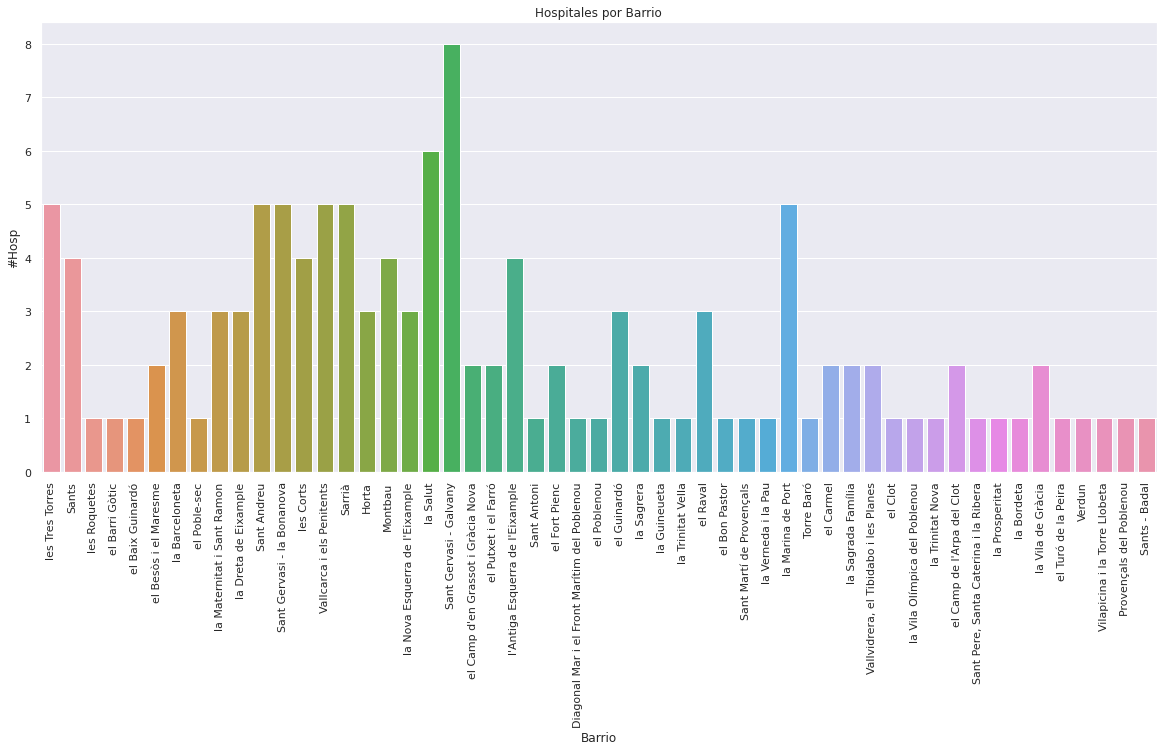

In [86]:
#cantidad de siniestros a por año
ax=sns.countplot('NUM_BARRI',data=Hosp_clean)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel('#Hosp')
ax.set_xlabel('Barrio')
ax.set_title('Hospitales por Barrio')

